# Minimizar falsos positivos en compras presenciales

### Manuel Rodas 21509

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("dataset_feature_engineering.csv")


print("Shape:", df.shape)
df.head()


Shape: (1852394, 35)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [ ]:

df.isnull().sum()


df.describe()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


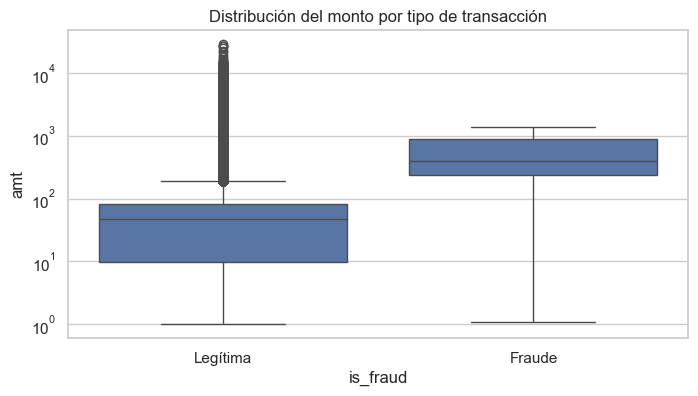

In [ ]:

plt.figure(figsize=(8,4))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Distribución del monto por tipo de transacción')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()


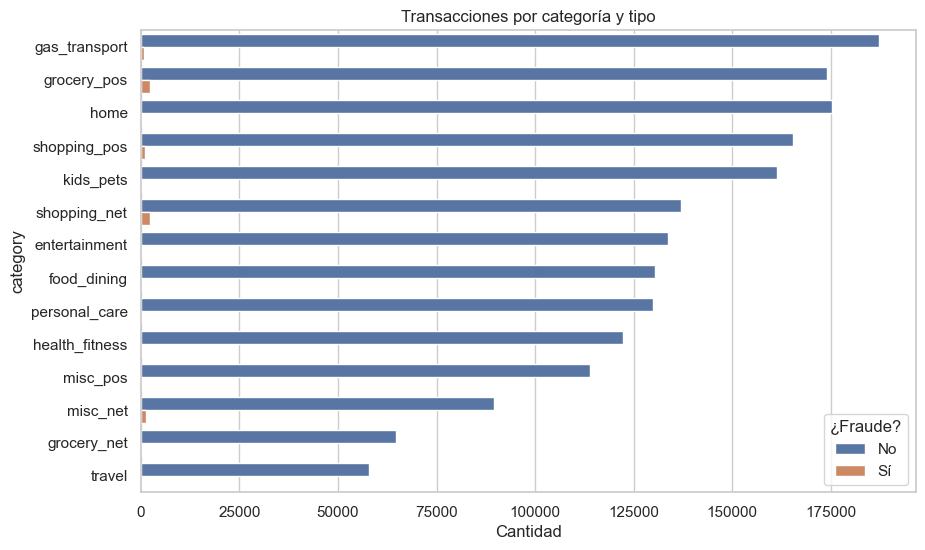

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', hue='is_fraud', order=df['category'].value_counts().index)
plt.title("Transacciones por categoría y tipo")
plt.xlabel("Cantidad")
plt.legend(title="¿Fraude?", labels=["No", "Sí"])
plt.show()


Porcentaje de fraude en compras POS: 0.79%


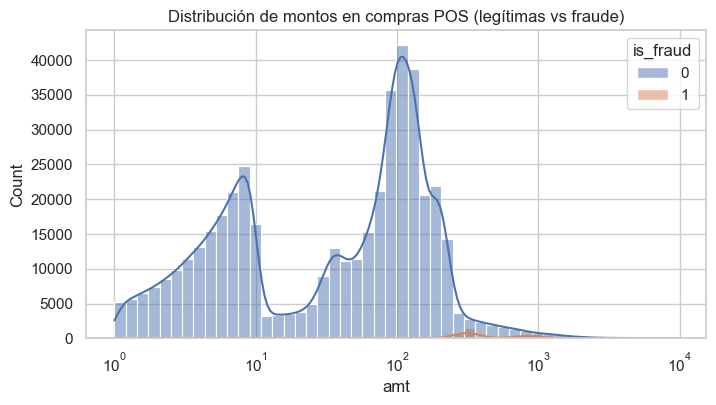

In [ ]:

df_pos = df[df['category'].str.contains('pos')]


fraud_pos = df_pos['is_fraud'].mean()
print(f"Porcentaje de fraude en compras POS: {fraud_pos:.2%}")


plt.figure(figsize=(8,4))
sns.histplot(data=df_pos, x='amt', hue='is_fraud', bins=50, kde=True, log_scale=True)
plt.title("Distribución de montos en compras POS (legítimas vs fraude)")
plt.show()


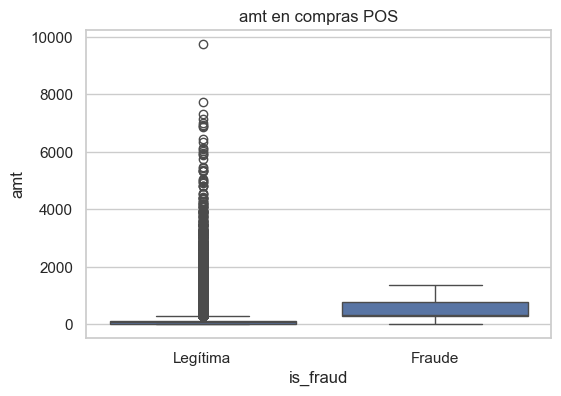

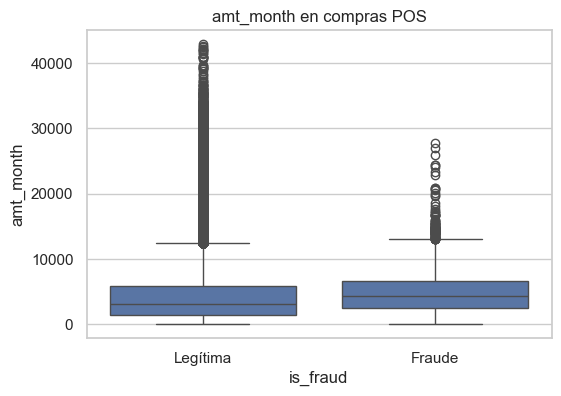

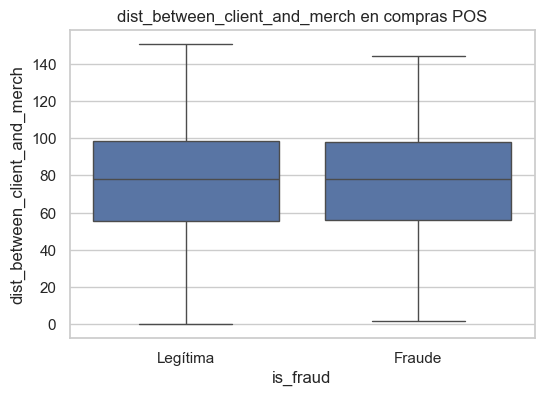

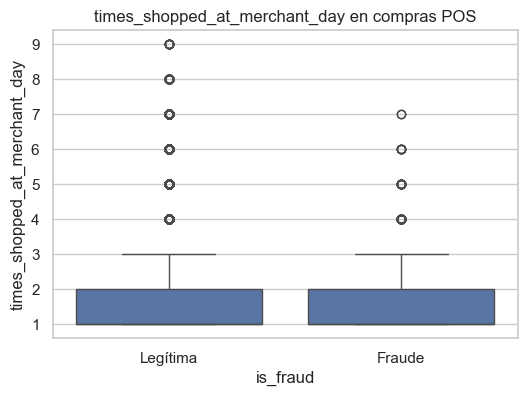

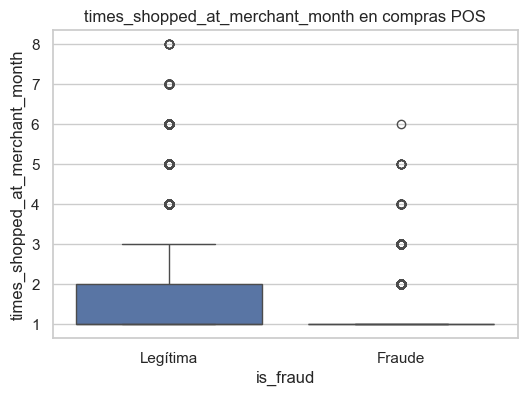

In [ ]:

features_behavior = [
    'amt', 'amt_month', 'dist_between_client_and_merch',
    'times_shopped_at_merchant_day',
    'times_shopped_at_merchant_month'
]


for feature in features_behavior:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_pos, x='is_fraud', y=feature)
    plt.title(f"{feature} en compras POS")
    plt.xticks([0, 1], ['Legítima', 'Fraude'])
    plt.show()


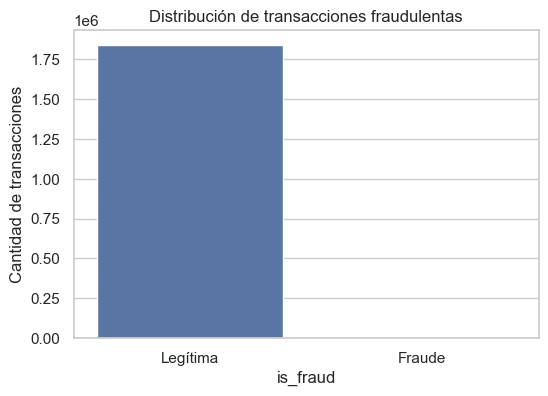

Porcentaje de fraude general: 0.52%


In [ ]:

fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.ylabel("Cantidad de transacciones")
plt.title("Distribución de transacciones fraudulentas")
plt.show()


fraud_rate = df['is_fraud'].mean()
print(f"Porcentaje de fraude general: {fraud_rate:.2%}")


In [ ]:

selected_features = [
    'amt',                                 # Monto individual de la transacción
    'amt_month',                           # Monto total gastado ese mes
    'amt_year',                            # Monto total gastado ese año
    'dist_between_client_and_merch',      # Distancia entre cliente y comercio
    'times_shopped_at_merchant_day',      # Veces que compró en ese comercio ese día
    'times_shopped_at_merchant_month',    # Veces que compró en ese comercio ese mes
    'times_shopped_at_merchant_year'      # Veces que compró en ese comercio ese año
]

X = df[selected_features]
y = df['is_fraud']


X.isnull().sum()


amt                                0
amt_month                          0
amt_year                           0
dist_between_client_and_merch      0
times_shopped_at_merchant_day      0
times_shopped_at_merchant_month    0
times_shopped_at_merchant_year     0
dtype: int64

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/Users/manuelrodasgordillo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [17:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

AUC: 0.9749704115524771
F1 Score: 0.32230439859867654


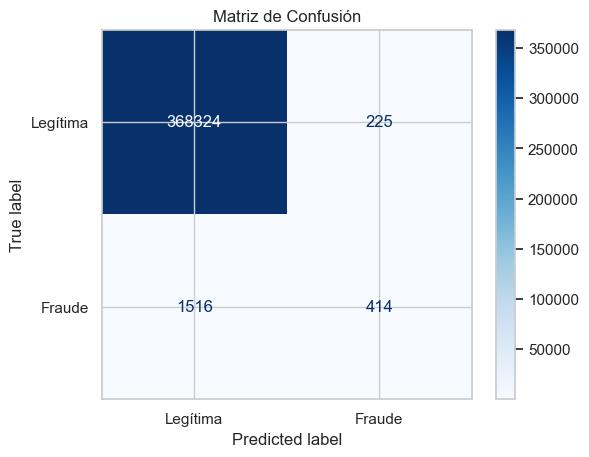

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("F1 Score:", f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Legítima", "Fraude"]).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


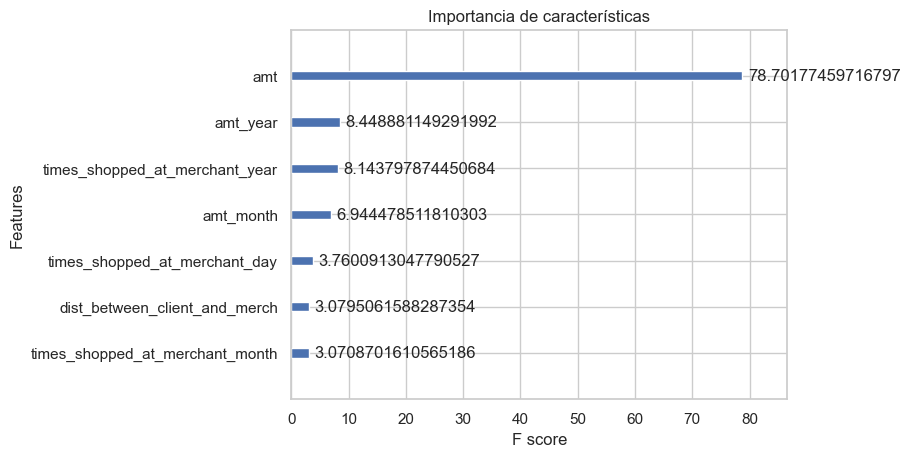

In [18]:
xgb.plot_importance(model, importance_type='gain')
plt.title("Importancia de características")
plt.show()
